In [1]:
# Install the py7zr library
!pip install py7zr

# Import the library
import py7zr

# Path to the .7z file
file_path = '/content/dataletter.7z'  # Change to the actual path

# Extract the .7z file
with py7zr.SevenZipFile(file_path, mode='r') as z:
    z.extractall(path='/content/dataletter')  # Change to the directory where you want to extract

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 87.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.7/413.7 kB 31.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt

# Load the combined dataset
data_file = "test.csv"  # Path to your CSV file
data = pd.read_csv(data_file)

# Drop unnecessary columns
columns_to_drop = ['timestamp', 'user_id']  # Modify if there are other irrelevant columns
data = data.drop(columns=[col for col in columns_to_drop if col in data.columns])

# Separate features (X) and target labels (y)
X = data.drop(columns=['Label'])  # Drop the 'Label' column (features only)
y = data['Label']  # Target labels

# Define the class labels (A to R)
classes = [chr(i) for i in range(ord('A'), ord('R')+1)]  # List of characters from A to R

# Generate a custom set of colors using matplotlib's tab20 colormap
colors = plt.cm.get_cmap('tab20', len(classes))  # Using 'tab20' colormap, which has 20 colors

# Create a new DataFrame to prepare the data for Plotly
data['Color'] = data['Label'].map(lambda x: colors(ord(x) - ord('A')))

# Create an interactive 3D scatter plot with Plotly
fig = px.scatter_3d(
    data,
    x=data.columns[0],  # Feature 1
    y=data.columns[1],  # Feature 2
    z=data.columns[2],  # Feature 3
    color='Label',  # Color by class label
    title="Interactive 3D Scatter Plot of Classes A to R",
    labels={'Label': 'Class', 'x': 'Feature 1', 'y': 'Feature 2', 'z': 'Feature 3'},
    color_discrete_map={classes[i]: colors(i) for i in range(len(classes))},  # Map classes to colors
)

# Increase the size of the plot by adjusting the layoutimport pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the combined dataset
data_file = "/content/test.csv"  # Path to your CSV file
data = pd.read_csv(data_file)

# Drop unnecessary columns
columns_to_drop = ['timestamp', 'user_id']  # Modify if there are other irrelevant columns
data = data.drop(columns=[col for col in columns_to_drop if col in data.columns])

# Separate features (X) and target labels (y)
X = data.drop(columns=['Label'])  # Drop the 'Label' column (features only)
y = data['Label']  # Target labels

# Perform PCA to reduce the features to 3 principal components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Create a new DataFrame with the PCA-transformed data
pca_data = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
pca_data['Label'] = y  # Add the label column for color mapping

# Define the class labels (A to R)
classes = [chr(i) for i in range(ord('A'), ord('R')+1)]  # List of characters from A to R

# Generate a custom set of colors using matplotlib's tab20 colormap
colors = plt.cm.get_cmap('tab20', len(classes))  # Using 'tab20' colormap, which has 20 colors

# Create an interactive 3D scatter plot with Plotly
fig = px.scatter_3d(
    pca_data,
    x='PC1',  # First principal component
    y='PC2',  # Second principal component
    z='PC3',  # Third principal component
    color='Label',  # Color by class label
    title="Interactive 3D PCA Scatter Plot of Classes A to R",
    labels={'Label': 'Class', 'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2', 'PC3': 'Principal Component 3'},
    color_discrete_map={classes[i]: colors(i) for i in range(len(classes))},  # Map classes to colors
)

# Increase the size of the plot by adjusting the layout
fig.update_layout(
    width=1200,  # Set the width of the plot
    height=800,  # Set the height of the plot
    autosize=False  # Disable auto sizing
)

# Show the plot
fig.show()

fig.update_layout(
    width=1200,  # Set the width of the plot
    height=800,  # Set the height of the plot
    autosize=False  # Disable auto sizing
)

# Show the plot
fig.show()

<ipython-input-2-b7d0aaf00434>:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(classes))  # Using 'tab20' colormap, which has 20 colors
<ipython-input-2-b7d0aaf00434>:69: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



Epoch 1/50
10665/10665 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - accuracy: 0.8053 - loss: 0.5491 - val_accuracy: 0.9697 - val_loss: 0.1073 - learning_rate: 0.0010
Epoch 2/50
10665/10665 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - accuracy: 0.9294 - loss: 0.2133 - val_accuracy: 0.9785 - val_loss: 0.0756 - learning_rate: 0.0010
Epoch 3/50
10665/10665 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - accuracy: 0.9459 - loss: 0.1685 - val_accuracy: 0.9827 - val_loss: 0.0630 - learning_rate: 0.0010
Epoch 4/50
10665/10665 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - accuracy: 0.9530 - loss: 0.1499 - val_accuracy: 0.9827 - val_loss: 0.0611 - learning_rate: 0.0010
Epoch 5/50
10665/10665 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - accuracy: 0.9580 - loss: 0.1352 - val_accuracy: 0.9854 - val_loss: 0.0537 - learning_rate: 0.0010
Epoch 6/50
10665/10665 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.9614 - loss: 0.1257 - val_accuracy: 0.9862 - val_loss: 0.0502 - learning_rate: 0.0010
Epoch 7/50
10665/10665 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step -

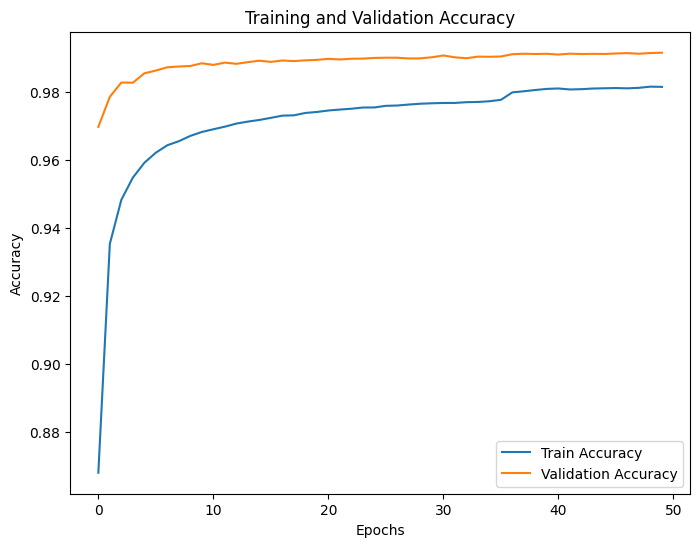

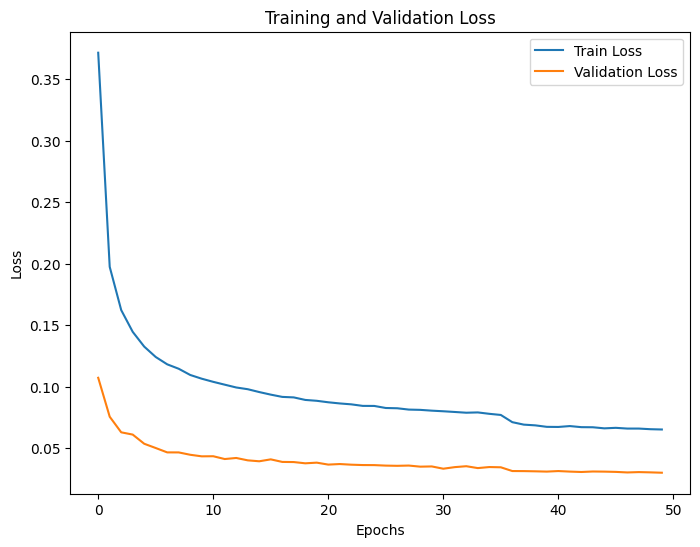

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load Dataset
def load_data(file_paths):
    datasets = []
    for letter, path in file_paths.items():
        df = pd.read_csv(path)
        df['Letter'] = letter  # Add the letter as the label
        datasets.append(df)
    return pd.concat(datasets, axis=0)

# Define file paths for each letter dataset (update with actual paths)
file_paths = {
    'a': '/content/dataletter/dataletter/a/a.csv',
    'b': '/content/dataletter/dataletter/b/b.csv',
    'c': '/content/dataletter/dataletter/c/c.csv',
    'd': '/content/dataletter/dataletter/d/d.csv',
    'e': '/content/dataletter/dataletter/e/e.csv',
    'f': '/content/dataletter/dataletter/f/f.csv',
    'g': '/content/dataletter/dataletter/g/g.csv',
    'h': '/content/dataletter/dataletter/h/h.csv',
    'i': '/content/dataletter/dataletter/i/i.csv',
    'j': '/content/dataletter/dataletter/j/j.csv',
    'k': '/content/dataletter/dataletter/k/k.csv',
    'l': '/content/dataletter/dataletter/l/l.csv',
    'm': '/content/dataletter/dataletter/m/m.csv',
    'n': '/content/dataletter/dataletter/n/n.csv',
    'o': '/content/dataletter/dataletter/o/o.csv',
    'p': '/content/dataletter/dataletter/p/p.csv',
    'q': '/content/dataletter/dataletter/q/q.csv',
    'r': '/content/dataletter/dataletter/r/r.csv',
    's': '/content/dataletter/dataletter/s/s.csv',
    't': '/content/dataletter/dataletter/t/t.csv',
    'u': '/content/dataletter/dataletter/u/u.csv',
    'v': '/content/dataletter/dataletter/v/v.csv',
    'w': '/content/dataletter/dataletter/w/w.csv',
    'x': '/content/dataletter/dataletter/x/x.csv',
    'y': '/content/dataletter/dataletter/y/y.csv',
    'z': '/content/dataletter/dataletter/z/z.csv'
}

# Load and preprocess data
data = load_data(file_paths)
data = data.drop(columns=['timestamp', 'user_id', 'Folder', 'Qw', 'Qx', 'Qy', 'Qz',
                          'ACCx_body', 'ACCy_body', 'ACCz_body', 'ACCx_world',
                          'ACCy_world', 'ACCz_world'])  # Drop unnecessary columns

# Separate features and labels
X = data.drop(columns=['Letter'])
y = data['Letter']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_pca = pca.fit_transform(X_scaled)

# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(
    X_pca, y, test_size=0.3, random_state=42, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# Convert labels to categorical format (one-hot encoding)
y_train_dummies = pd.get_dummies(y_train)
y_val_dummies = pd.get_dummies(y_val)
y_test_dummies = pd.get_dummies(y_test)

from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),  # Reduced dropout
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),  # Reduced dropout
    Dense(y_train_dummies.shape[1], activation='softmax')  # Number of classes as output
])

# Use a lower initial learning rate
optimizer = Adam(learning_rate=0.001)

# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Adjusted Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Train the model with updated parameters
history = model.fit(
    X_train, y_train_dummies.values,
    validation_data=(X_val, y_val_dummies.values),
    epochs=50,  # Increased epochs
    batch_size=64,  # Try larger batch size
    callbacks=[early_stopping, lr_scheduler],
    verbose=1
)

# Plot Training and Validation Accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

4571/4571 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step
Sample of Predictions vs Actual:
       Predicted Actual
117318         x      x
48557          t      t
121054         x      x
28346          b      b
121140         t      t
105419         j      j
87101          k      k
145246         u      u
42269          z      z
15037          b      b

Classification Report:
              precision    recall  f1-score   support

           a       0.99      0.99      0.99      5625
           b       1.00      0.99      0.99      5625
           c       0.98      0.97      0.98      5625
           d       0.99      0.98      0.99      5625
           e       0.98      0.98      0.98      5625
           f       0.99      1.00      0.99      5625
           g       1.00      1.00      1.00      5625
           h       1.00      1.00      1.00      5625
           i       0.99      0.99      0.99      5625
           j       1.00      1.00      1.00      5625
           k       0.99      0.99      0.

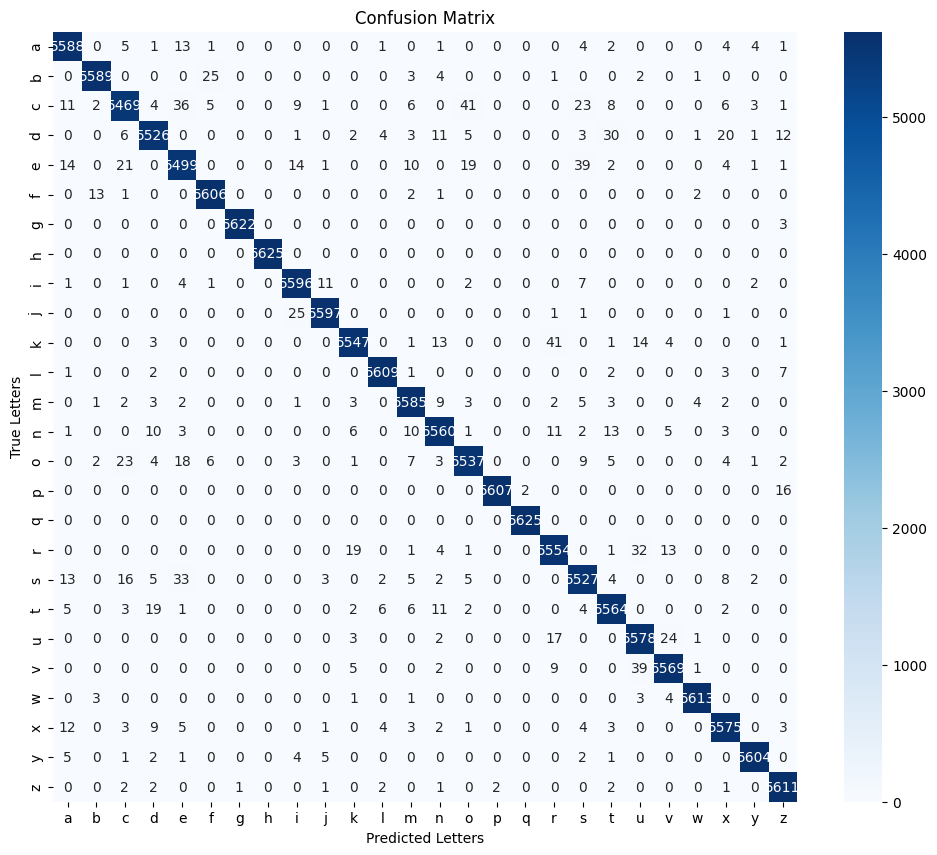

In [13]:
# Generate predictions on the test set
y_pred = model.predict(X_test)

# Convert predictions from probabilities to class indices
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert actual test labels to class indices
y_test_classes = y_test.apply(lambda x: list(y_train_dummies.columns).index(x))

# Display some examples of predictions vs actual
comparison_df = pd.DataFrame({
    'Predicted': [y_train_dummies.columns[i] for i in y_pred_classes],
    'Actual': [y_train_dummies.columns[i] for i in y_test_classes]
})

# Show a random sample of 10 comparisons
print("Sample of Predictions vs Actual:")
print(comparison_df.sample(10))

# Classification report
print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred_classes, target_names=y_train_dummies.columns))

# Confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=y_train_dummies.columns,
            yticklabels=y_train_dummies.columns)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Letters")
plt.ylabel("True Letters")
plt.show()


In [14]:
# prompt: give me a code to save my model

model.save('my_model.h5')

In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score

# Load the saved model
model = load_model('my_model.h5')

# Function to preprocess new data (same as training preprocessing)
def preprocess_new_data(df):
    # Drop unnecessary columns
    df = df.drop(columns=['Qw', 'Qx', 'Qy', 'Qz',
                          'ACCx_body', 'ACCy_body', 'ACCz_body', 'ACCx_world',
                          'ACCy_world', 'ACCz_world'])

    # Assuming 'Letter' column exists, drop it if it's not needed
    if 'Letter' in df.columns:
        df = df.drop('Letter', axis=1)

    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df)

    # Apply PCA (use the same PCA object from training if possible)
    pca = PCA(n_components=0.95)  # Retain 95% of variance
    X_pca = pca.fit_transform(X_scaled)
    return X_pca

# Load new data file
new_data_filepath = '/content/combined_data.csv'  # Replace 'new_data.csv' with the actual path
new_data = pd.read_csv(new_data_filepath)

# Get actual labels (assuming 'Letter' column contains the actual labels)
actual_letters = new_data['Letter'].values

# Preprocess the new data
X_new_processed = preprocess_new_data(new_data)

# Make predictions
y_pred = model.predict(X_new_processed)

# Get the predicted classes (letters)
predicted_indices = np.argmax(y_pred, axis=1)

# Map class indices back to letter labels
letter_labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
predicted_letters = [letter_labels[i] for i in predicted_indices]

# Compare actual and predicted letters
comparison_df = pd.DataFrame({
    'Actual Letter': actual_letters,
    'Predicted Letter': predicted_letters
})

# Print the comparison table
print("Comparison of Actual vs Predicted Letters:")
print(comparison_df)

# Calculate accuracy (optional)
accuracy = accuracy_score(actual_letters, predicted_letters)
print(f"Accuracy: {accuracy * 100:.2f}%")


30469/30469 ━━━━━━━━━━━━━━━━━━━━ 43s 1ms/step
Comparison of Actual vs Predicted Letters:
       Actual Letter Predicted Letter
0                  A                A
1                  A                A
2                  A                A
3                  A                A
4                  A                A
...              ...              ...
974995             Z                Z
974996             Z                Z
974997             Z                Z
974998             Z                Z
974999             Z                Z

[975000 rows x 2 columns]
Accuracy: 99.22%


In [21]:
# prompt: from the above cell output can you make me the code to show the wrongly predicted output

# Assuming 'comparison_df' is the DataFrame from the previous cell's output
wrong_predictions = comparison_df[comparison_df['Predicted Letter'] != comparison_df['Actual Letter']]
print("Wrongly Predicted Output:")
wrong_predictions

Wrongly Predicted Output:


,Actual Letter,Predicted Letter
1086,A,E
1180,A,Y
1431,A,Y
1523,B,F
1567,B,F
...,...,...
971788,X,L
971905,X,L
972109,Y,I
972363,Y,I


No charts were generated by quickchart
